### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [22]:
data = pd.read_csv('data/coupons.csv')

In [28]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6487,Home,Alone,Sunny,80,10PM,Bar,1d,Male,41,Divorced,1,Bachelors degree,Sales & Related,$62500 - $74999,NaN,never,never,4~8,1~3,never,1,1,0,1,0,0
8631,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Female,26,Married partner,0,Bachelors degree,Unemployed,$87500 - $99999,NaN,1~3,less1,NaN,less1,less1,1,0,0,0,1,1
7432,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Single,0,Bachelors degree,Computer & Mathematical,$25000 - $37499,NaN,less1,less1,4~8,1~3,never,1,1,1,0,1,0
2704,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,41,Married partner,1,Bachelors degree,Education&Training&Library,$100000 or More,NaN,less1,1~3,1~3,4~8,less1,1,1,0,0,1,1
11129,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,50plus,Single,0,Bachelors degree,Management,$100000 or More,NaN,1~3,4~8,4~8,1~3,less1,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [112]:
data.info(verbose=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

Several problems are evident in the data:
- "passenger" is misspelled
- "car" is very sparse, and values present seem to be low-value user submissions
- The columns corresponding to establishment types also have some nulls (but small relative to the overall amount of data).


In [140]:
# Example 'car'
pd.set_option('display.max_columns', None)
print(data['car'][~data['car'].isnull()].value_counts())

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


In [141]:
# Examine establishment types
print(data['Bar'][~data['Bar'].isnull()].value_counts())
print(f"{int(data['Bar'].isnull().sum())} missing Bar values")

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
107 missing Bar values


`car` seems to correspond to non-default car options; however, when unspecified, it seems to correspond to the most common case, of just being a miscellaneous car. Even when specified, it's hard to see how the actual values in the dataset would pertain to the goal of the analysis (e.g., "crossover" versus "Mazda5"). At any rate, we do not have enough data here to meaningfully improve the analysis, so this column can be dropped.

The establishment type columns, which are mostly present, are difficult to interpret when missing. It's tempting to drop them, but they contribute enough data (1.7% of `CoffeeHouse`, for example) that dropping them could skew the analysis, as they may provide useful signal. Therefore, they should be filled in with a default value representing that they are unknown. Since all the nulls (other than in `car`) are establishment types, we can just apply a default value to the whole table.

In [59]:
# Rename "passanger" to "passenger"
data_cleaned = data.rename(columns = {'passanger': 'passenger'})

# Drop 'car'
data_cleaned.drop('car', axis=1, inplace=True)

# Specify that missing establishment types are "unknown"
data_cleaned.fillna('unknown', inplace=True)

# Check our work
print("Nulls in entire dataset: " + str(data_cleaned.isnull().sum().sum()))
data_cleaned.sample(10)

Nulls in entire dataset: 0


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4557,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,31,Married partner,1,Some college - no degree,Office & Administrative Support,$37500 - $49999,1~3,1~3,4~8,1~3,less1,1,0,0,0,1,0
2866,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,31,Married partner,1,Some college - no degree,Business & Financial,$37500 - $49999,unknown,unknown,unknown,unknown,unknown,1,1,0,0,1,1
8146,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,46,Unmarried partner,0,Graduate degree (Masters or Doctorate),Unemployed,$100000 or More,never,less1,less1,1~3,less1,1,1,0,0,1,1
10119,Work,Alone,Snowy,30,7AM,Carry out & Take away,1d,Female,36,Married partner,1,Graduate degree (Masters or Doctorate),Healthcare Practitioners & Technical,$87500 - $99999,1~3,4~8,4~8,4~8,1~3,1,1,0,1,0,1
231,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,1,1,0,1,1
3796,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,26,Single,0,Some college - no degree,Food Preparation & Serving Related,$25000 - $37499,1~3,1~3,1~3,1~3,less1,1,1,0,0,1,1
1505,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,31,Unmarried partner,0,Bachelors degree,Legal,$100000 or More,never,less1,less1,1~3,1~3,1,1,0,0,1,1
10688,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Management,$12500 - $24999,1~3,4~8,1~3,1~3,unknown,1,0,0,0,1,1
11424,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,0,Some college - no degree,Sales & Related,$50000 - $62499,1~3,1~3,gt8,4~8,1~3,1,0,0,1,0,0
9286,Work,Alone,Sunny,30,7AM,Bar,1d,Female,26,Unmarried partner,0,High School Graduate,Healthcare Support,$25000 - $37499,less1,less1,1~3,1~3,1~3,1,1,0,1,0,0


4. What proportion of the total observations chose to accept the coupon?



In [60]:
accepted_proportion = data_cleaned['Y'].value_counts()[1] / data_cleaned['Y'].count() * 100
print(f"{accepted_proportion:.2f}% accepted the coupon.")


56.84% accepted the coupon.


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon counts by type')

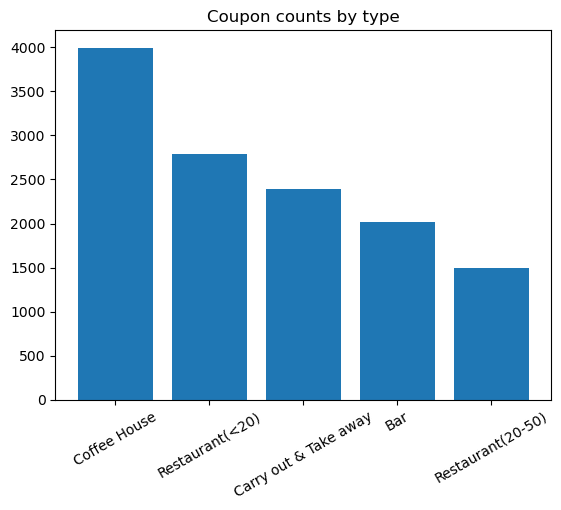

In [61]:
coupon_counts = pd.DataFrame(data_cleaned['coupon'].value_counts()).reset_index()
plt.bar(coupon_counts['coupon'], coupon_counts['count'])
plt.xticks(rotation=30)
plt.title("Coupon counts by type")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Count of temperatures')

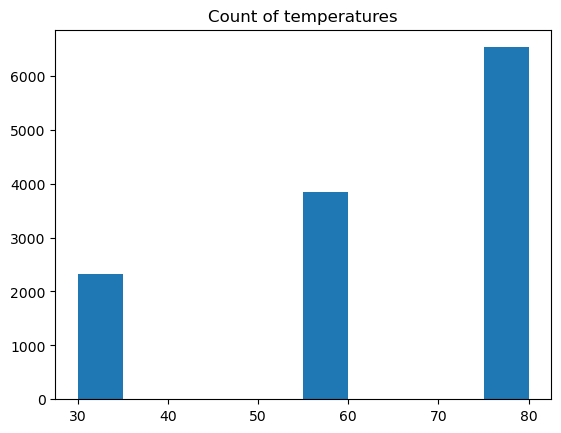

In [62]:
data_cleaned['temperature'].value_counts()
plt.hist(data_cleaned['temperature'])
plt.title("Count of temperatures")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [50]:
bar_coupons = data_cleaned[data_cleaned['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?

In [51]:
bar_coupon_acceptance_rate = bar_coupons['Y'].value_counts()[1] / bar_coupons['Y'].count() * 100
print(f"{bar_coupon_acceptance_rate:.2f}% of bar coupons were accepted")

41.00% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
teetotaler_types = ['never', 'less1', '1~3']
boozy_types = ['4~8', 'gt8']
# exclude unknowns from our analysis

teetotaler_acceptance = bar_coupons[bar_coupons['Bar'].isin(teetotaler_types)]['Y'].value_counts()
boozy_acceptance = bar_coupons[bar_coupons['Bar'].isin(boozy_types)]['Y'].value_counts()
teetotaler_yes = teetotaler_acceptance[1]
teetotaler_no = teetotaler_acceptance[0]
boozy_yes = boozy_acceptance[1]
boozy_no = boozy_acceptance[0]
teetotaler_rate = teetotaler_yes / (teetotaler_yes+teetotaler_no) * 100
boozy_rate = boozy_yes / (boozy_yes + boozy_no) * 100

print(f"Frequent bar customers accepted bar coupons at a rate of {boozy_rate:.2f}%,\ncompared with {teetotaler_rate:.2f}% of non-frequent bar attenders.")

Frequent bar customers accepted bar coupons at a rate of 76.88%,
compared with 37.06% of non-frequent bar attenders.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
genz_ages = ['below21', '21']
tippler_types = ['4~8', 'gt8', '1~3']
minimal_types = ['never', 'less1']
# exclude unknowns from our analysis

tippler_acceptance = bar_coupons[(bar_coupons['Bar'].isin(tippler_types)) & (~bar_coupons['age'].isin(genz_ages))]['Y'].value_counts()
minimal_acceptance = bar_coupons[(bar_coupons['Bar'].isin(minimal_types)) | (bar_coupons['age'].isin(genz_ages))]['Y'].value_counts()
tippler_yes = tippler_acceptance[1]
tippler_no = tippler_acceptance[0]
minimal_yes = minimal_acceptance[1]
minimal_no = minimal_acceptance[0]
tippler_rate = tippler_yes / (tippler_yes+tippler_no) * 100
minimal_rate = minimal_yes / (minimal_yes+minimal_no) * 100

print(f"Frequent bar customers over 25 accepted bar coupons at a rate of {tippler_rate:.2f}%,\ncompared with {minimal_rate:.2f}% of all others.")

Frequent bar customers over 25 accepted bar coupons at a rate of 69.52%,
compared with 33.42% of all others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [101]:
passenger_kid_or_alone = ['Alone', 'Kid(s)']
special_acceptance = bar_coupons[(bar_coupons['Bar'].isin(tippler_types)) & (~bar_coupons['passenger'].isin(passenger_kid_or_alone)) & (bar_coupons['occupation'] != 'Farming Fishing & Forestry')]['Y'].value_counts()
nonspecial_acceptance = bar_coupons[~((bar_coupons['Bar'].isin(tippler_types)) & (~bar_coupons['passenger'].isin(passenger_kid_or_alone)) & (bar_coupons['occupation'] != 'Farming Fishing & Forestry'))]['Y'].value_counts()
                          
# "had passengers that were not a kid": all `passenger` values other than Alone and Kid(s)
special_yes = special_acceptance[1]
special_no = special_acceptance[0]
nonspecial_yes = nonspecial_acceptance[1]
nonspecial_no = nonspecial_acceptance[0]
special_rate = special_yes / (special_yes + special_no) * 100
nonspecial_rate = nonspecial_yes / (nonspecial_yes + nonspecial_no) * 100

print(f"Special customers (those with passengers who weren't kids, and frequented bars more than once a month,\nand had occupations other than farming, fishing, or forestry) accepted bar coupons at a rate of {special_rate:.2f}%,\ncompared with {nonspecial_rate:.2f}% of everyone else.")


Special customers (those with passengers who weren't kids, and frequented bars more than once a month,
and had occupations other than farming, fishing, or forestry) accepted bar coupons at a rate of 71.79%,
compared with 37.71% of everyone else.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [119]:
under30_types = ['21', '26', 'below21']
restaurant_frequent_types = ['4~8', 'gt8']
lowincome = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

class1_acceptance = bar_coupons[(bar_coupons['Bar'].isin(tippler_types)) &
  (~bar_coupons['passenger'].isin(passenger_kid_or_alone)) &
  (bar_coupons['maritalStatus'] != 'Widowed')]['Y'].value_counts()
class2_acceptance = bar_coupons[(bar_coupons['Bar'].isin(tippler_types)) &
  (bar_coupons['age'].isin(under30_types))]['Y'].value_counts()
class3_acceptance = bar_coupons[(bar_coupons['RestaurantLessThan20'].isin(restaurant_frequent_types)) &
  (bar_coupons['income'].isin(lowincome))]['Y'].value_counts()
  
def acceptance_rate(acceptance):
    yes = acceptance[1]
    no = acceptance[0]
    return yes / (yes + no) * 100

class1_rate = acceptance_rate(class1_acceptance)
class2_rate = acceptance_rate(class2_acceptance)
class3_rate = acceptance_rate(class3_acceptance)
print(class1_rate)
print(class2_rate)
print(class3_rate)

71.7948717948718
72.17391304347827
45.348837209302324


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

By the far the most important predictor of acceptance rate was the rate of frequenting a bar. Customers visiting a bar four or more times a month were 76.88% likely to take the coupon.

However, there were not as many of these customers; in order to cast a wider net to reach more customers, we look at other factors. Having passengers who were not a kid was another strong predictor, as long as the driver has disposable income (as judged by _not_ being someone dining at cheap restaurants more than 4 times per month, and having income less than 50K).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [139]:
frequent_types = ['1~3', '4~8', 'gt8']

frequent_coffee_acceptance = data_cleaned[data_cleaned['CoffeeHouse'].isin(frequent_types)]['Y'].value_counts()
infrequent_coffee_acceptance = data_cleaned[~data_cleaned['CoffeeHouse'].isin(frequent_types)]['Y'].value_counts()

frequent_rate = acceptance_rate(frequent_coffee_acceptance)
infrequent_rate = acceptance_rate(infrequent_coffee_acceptance)

print(f"Frequent coffeehouse customers (those attending 1 or more time per month) were {frequent_rate:.2f}% likely\nto accept the coupon, compared with {infrequent_rate:.2f}% of less-frequent customers.")

Frequent coffeehouse customers (those attending 1 or more time per month) were 63.51% likely
to accept the coupon, compared with 50.62% of less-frequent customers.
